#  서울특별시 코로나 바이러스 크롤링 데이터

## 1. 전처리

In [18]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'


In [20]:
corona_data = pd.read_csv('C:\study\workspace_python\pdsample\datasets\mydata\corona_df_2021_08_14.csv', encoding = 'utf-8')

In [21]:
corona_data.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,70870,222111,2021-08-13,기타,-,감염경로 조사중,NaN
1,70869,221232,2021-08-13,기타,-,감염경로 조사중,NaN
2,70868,221356,2021-08-13,성북구,-,감염경로 조사중,NaN
3,70867,221710,2021-08-13,동대문구,-,감염경로 조사중,NaN
4,70866,220502,2021-08-13,타시도,-,기타 확진자 접촉,NaN


In [22]:
corona_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40400 entries, 0 to 40399
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      40400 non-null  int64 
 1   환자      40400 non-null  int64 
 2   확진일     40400 non-null  object
 3   거주지     40400 non-null  object
 4   여행력     40400 non-null  object
 5   접촉력     40400 non-null  object
 6   퇴원현황    31778 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.2+ MB


## 1.1 Null 값 처리

<AxesSubplot:>

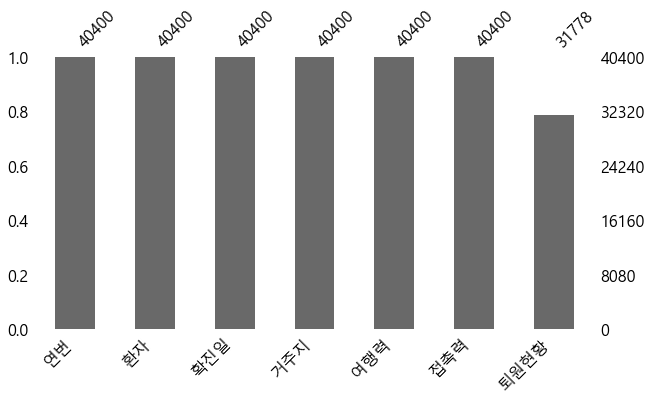

In [23]:
import missingno as msno

msno.bar(corona_data, figsize = (10,5))

<AxesSubplot:>

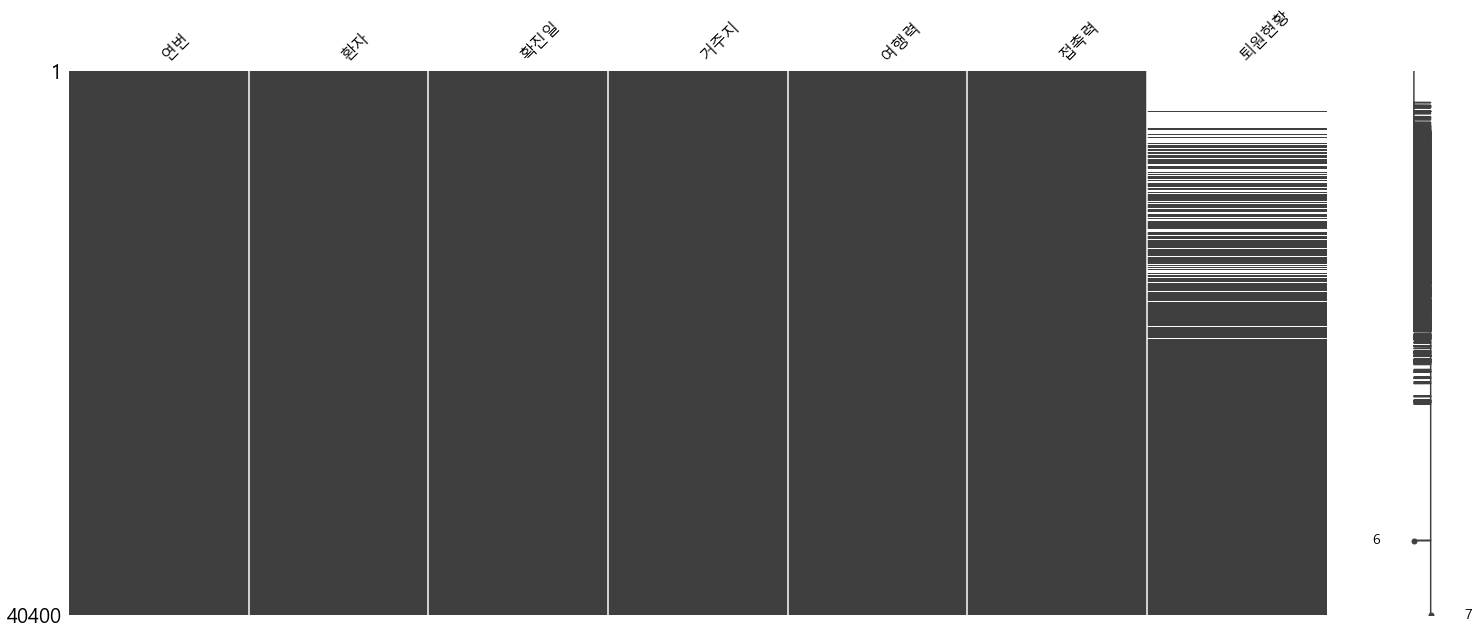

In [24]:
msno.matrix(corona_data)

### 1.1.2 퇴원현황 column

- 퇴원현황만 null 값 있는 거 확인.

In [25]:
counted_null = corona_data['퇴원현황'].isnull().sum()
print('코로나 크롤링 데이터 퇴원현황 null 개수 : ', counted_null)

코로나 크롤링 데이터 퇴원현황 null 개수 :  8622


In [26]:
# https://www.seoul.go.kr/coronaV/coronaStatus.do 
# 사이트를 확인해보니 퇴원하기 전 퇴원현황을 Null 값으로 처리했다는 것을 유추가능.
# null 을 '퇴원전' 으로 수정

-

corona_data['퇴원현황'].unique()

SyntaxError: invalid syntax (<ipython-input-26-a03c554b2926>, line 5)

In [27]:
corona_data['퇴원현황'] = corona_data['퇴원현황'].fillna('퇴원전')


<AxesSubplot:>

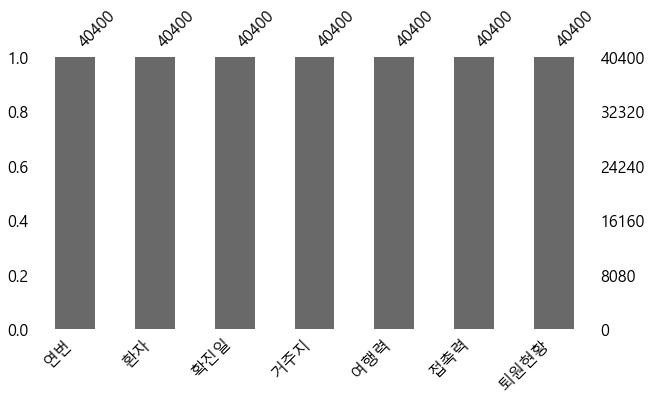

In [28]:
msno.bar(corona_data, figsize = (10,5))

### 1.1.3 여행력 column

In [29]:
corona_data['여행력'].unique()

array(['-', '미국', '독일', '폴란드', '아랍에미레이트', '카자흐스탄', '기타 확진자 접촉', '인도네시아',
       '스리랑카', '중국', '네덜란드', '인도', '러시아', '터키', '파라과이', '우즈베키스탄', '가나',
       '~8.8', '일본', '영국', '몽골', '체코', '아랍에미리트', '우크라이나', '모잠비크',
       '키르키스스탄', '베트남', '태국', '몰타', '캐나다', '키르기스스탄', '미얀마', '이라크', '프랑스',
       '모스크바', '방글라데시', '파키스탄', '네날', '네팔', '러시아(두바이경유)', '필리핀',
       '아프리카 말라위', ' ', '말레이시아', '자카르타', '멕시코', '케냐', '쿠웨이트', 'UAE',
       '캄보디아', '스웨덴', '아랍에메리드(두바이)', '미국 괌', '으즈베키스탄', '인도네시아  ', '말레이지아',
       '인도네시아 자카르타', '스페인마드리드', '타지키스탄', '키르키스탄', '도미니카공화국', '인도네시아 ',
       '아프카니스탄', '시에라리온', '마포행복나눔마켓', '  ', '핀란드', '키르기스탄', '콜롬비아', '덴마크',
       '인도 ', '싱가폴', '브라질', '오만', '아프가니스탄', '아일랜드', '이스라엘', '아랍에미리트연합',
       '남아프리카공화국', '잠비아(아디스아바바)', '미국 ', '이집트', '짐바브웨', '이집트(카타르)',
       '방글라데시,아랍에미리트', '21.5.13', '사우디아라비아', '마케도니아', '중국(시안)', '이란',
       '헝가리', '파푸아뉴기니(포트모르즈비)', '파푸아뉴기니', '페루', '21.4.7', '강릉', '불가리아',
       '수단', '스위스', '중국(장춘)', '필리핀 ', '카타르', '인도 델리', '멕시코(미국경유)',
       '오스트

In [30]:
#"-" 를 여행력 없음으로 간주, 보기 쉽게 바꿀 예정

counted_null2 = len(corona_data[corona_data['여행력'] == '-'])
print('여행력 column null 값 개수 : ', counted_null2)
corona_data[corona_data['여행력'] == '-']

여행력 column null 값 개수 :  39848


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,70870,222111,2021-08-13,기타,-,감염경로 조사중,퇴원전
1,70869,221232,2021-08-13,기타,-,감염경로 조사중,퇴원전
2,70868,221356,2021-08-13,성북구,-,감염경로 조사중,퇴원전
3,70867,221710,2021-08-13,동대문구,-,감염경로 조사중,퇴원전
4,70866,220502,2021-08-13,타시도,-,기타 확진자 접촉,퇴원전
...,...,...,...,...,...,...,...
40395,30475,97579,2021-03-18,노원구,-,도봉구 소재 어린이집 관련(`21.3.),퇴원
40396,30474,97537,2021-03-18,강남구,-,서초구 소재 음악연습실 관련,퇴원
40397,30473,97570,2021-03-18,강동구,-,기타 확진자 접촉,사망
40398,30472,97448,2021-03-18,송파구,-,감염경로 조사중,퇴원


In [31]:
corona_data['여행력'].replace('-','없음', inplace = True)

In [32]:
corona_data.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,70870,222111,2021-08-13,기타,없음,감염경로 조사중,퇴원전
1,70869,221232,2021-08-13,기타,없음,감염경로 조사중,퇴원전
2,70868,221356,2021-08-13,성북구,없음,감염경로 조사중,퇴원전
3,70867,221710,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전
4,70866,220502,2021-08-13,타시도,없음,기타 확진자 접촉,퇴원전


## 2. Feature Engineering

## 2.1 칼럼 삭제

In [33]:
corona_data.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,70870,222111,2021-08-13,기타,없음,감염경로 조사중,퇴원전
1,70869,221232,2021-08-13,기타,없음,감염경로 조사중,퇴원전
2,70868,221356,2021-08-13,성북구,없음,감염경로 조사중,퇴원전
3,70867,221710,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전
4,70866,220502,2021-08-13,타시도,없음,기타 확진자 접촉,퇴원전


In [34]:
corona_data.drop(['연번'], axis = 1,inplace = True)

In [35]:
corona_data['확진일'].unique()

array(['2021-08-13', '2021-08-12', '2021-08-11', '2021-08-10',
       '2021-08-09', '2021-08-08', '2021-08-07', '2021-08-06',
       '2021-08-05', '2021-08-04', '2021-08-03', '2021-08-02',
       '2021-08-01', '2021-07-31', '2021-07-30', '2021-07-29',
       '2021-07-28', '2021-07-27', '2021-07-26', '2021-07-25',
       '2021-07-24', '2021-07-23', '2021-07-22', '2021-07-21',
       '2021-07-20', '2021-07-19', '2021-07-18', '2021-07-17',
       '2021-07-16', '2021-07-15', '2021-07-14', '2021-07-13',
       '2021-07-12', '2021-07-11', '2021-07-10', '2021-07-09',
       '2021-07-08', '2021-07-07', '2021-07-06', '2021-07-05',
       '2021-07-04', '2021-07-03', '2021-07-02', '2021-07-01',
       '2021-06-30', '2021-06-29', '2021-06-28', '2021-06-27',
       '2021-06-26', '2021-06-25', '2021-06-24', '2021-06-23',
       '2021-06-22', '2021-06-21', '2021-06-20', '2021-06-19',
       '2021-06-18', '2021-06-17', '2021-06-16', '2021-06-15',
       '2021-06-14', '2021-06-13', '2021-06-12', '2021-

## 2.2 칼럼 생성

확진일을 연도, 월, 일로 나누기

In [36]:
corona_data['연도'] = corona_data['확진일'].str.split('-', expand = True)[0]
corona_data['월'] = corona_data['확진일'].str.split('-', expand = True)[1]
corona_data['일'] = corona_data['확진일'].str.split('-', expand = True)[2]


In [37]:
#자료형 변경

corona_data['월'] = corona_data['월'].astype(int)
corona_data['일'] = corona_data['일'].astype(int)

In [38]:
corona_data.drop('확진일', axis = 1, inplace = True)

In [39]:
len(corona_data[(corona_data['월'] == 8) & (corona_data['일'] == 13)])

515

In [40]:
corona_data.head(10)

,환자,거주지,여행력,접촉력,퇴원현황,연도,월,일
0,222111,기타,없음,감염경로 조사중,퇴원전,2021,8,13
1,221232,기타,없음,감염경로 조사중,퇴원전,2021,8,13
2,221356,성북구,없음,감염경로 조사중,퇴원전,2021,8,13
3,221710,동대문구,없음,감염경로 조사중,퇴원전,2021,8,13
4,220502,타시도,없음,기타 확진자 접촉,퇴원전,2021,8,13
5,220262,동대문구,없음,감염경로 조사중,퇴원전,2021,8,13
6,221253,타시도,없음,기타 확진자 접촉,퇴원전,2021,8,13
7,221252,타시도,없음,감염경로 조사중,퇴원전,2021,8,13
8,220223,광진구,없음,감염경로 조사중,퇴원전,2021,8,13
9,221555,영등포구,없음,기타 확진자 접촉,퇴원전,2021,8,13


In [80]:
corona_data['접촉력'].str.split(' ', expand = True)[2].unique()

array([None, '접촉', '직장', '교육시설', '요양시설', '음식점', '시장', '실내체육시설', '종교시설',
       '여행모임', '사우나', '고시원', 'PC방', '물류센터', '학원', '공연연습실', '방문요양관련', '강습',
       '의료기관', '관련', '아동시설', '중학교', '전자회사', '어린이집', '요양병원', '서대문',
       '공유오피스', '세계선교사대회', '체육대회', '소재', '유치원', '방송인', '경기도', '운동시설',
       '노래연습장', '병원', '공연장', '종교,', '댄스연습실', '고시텔', '대학교', '지인모임',
       '실내운동시설', '고등학교', '노원구', '초등학교', '아동복지시설', '서초구', "관련('21.6.(3))",
       '개인과외교습소', '사회복지시설', '대학생', '숙박시설', '실내체육시설/강북구', "관련('21.6.(2))",
       "직장관련('21.6.)", '음식점,', '공공기관', '아동보호시설', "관련('21.5.(5))/마포구",
       "관련('21.6.)", '교육원', '용산구', '음악연습실', '모임', '지인', "관련('21.5.(6))",
       '강남구', '어르신돌봄시설', "관련('21.5.(3))", '관련(‘21.5.(2))', '직장관련',
       "관련('21.5.(4))", "관련('21.4.(2))", 'pc방', '댄스학원', '식당/교육시설',
       "관련('21.5.(2))", "직장관련('21.4.)", "관련('21.5.)", '빌딩', '음악학원',
       '체육시설', '게임개발업체', '공연', '실내', "관련('21.4.)", "종교시설('21년",
       '종교시설/타시도', '공공기관,', '어르신복지시설', '주점', '음악동호회', '건강체험시설', '가족/직장',
       '한방병원', '음악교

In [71]:
a = corona_data[(corona_data['접촉력'] != '감염경로 조사중') & (corona_data['접촉력'] != '기타 확진자 접촉') & 
           (corona_data['접촉력'] != '해외유입')]

In [78]:
a[a['새로운칼럼']== '중구']

,환자,거주지,여행력,접촉력,퇴원현황,연도,월,일
24,221073,은평구,없음,용산구 소재 직장 관련('21.8.),퇴원전,2021,8,13
49,221824,종로구,없음,중랑구 소재 교육시설 관련,퇴원전,2021,8,13
55,221550,은평구,없음,용산구 소재 직장 관련('21.8.),퇴원전,2021,8,13
59,221211,타시도,없음,병원 및 요양시설,퇴원전,2021,8,13
83,221504,구로구,없음,관악구 소재 음식점 관련('21.7.),퇴원전,2021,8,13
...,...,...,...,...,...,...,...,...
40391,97478,강북구,없음,서초구 소재 직장 관련('21.3.),퇴원,2021,3,18
40392,97501,중구,없음,서초구 소재 음악연습실 관련,퇴원,2021,3,18
40395,97579,노원구,없음,도봉구 소재 어린이집 관련(`21.3.),퇴원,2021,3,18
40396,97537,강남구,없음,서초구 소재 음악연습실 관련,퇴원,2021,3,18


In [79]:
a['접촉력'].str.split(' ', expand = True)[0].unique()

array(['용산구', '중랑구', '병원', '관악구', '동작구', '타시도', '수도권', '서초구', '강남구',
       '서대문구', '구로구', '강북구', '송파구', '종로구', '중구', '금천구', '영등포구', '마포구',
       '서울시', '경기', '강서구', '양천구', '은평,', '성북구', '성동구', '도봉구', '노원구',
       '동대문구', '광진구', '강동구', '은평구', '마포구,', '용산구,', '동북권', '타시도(고양시)',
       '타시도(인천시)', '지인', '금천구/영등포구'], dtype=object)

In [65]:
corona_data['접촉력'].unique()

음식점
직장
종교
병원
지인모임
기타


array(['감염경로 조사중', '기타 확진자 접촉', "용산구 소재 직장 관련('21.8.)", '중랑구 소재 교육시설 관련',
       '해외유입', '병원 및 요양시설', "관악구 소재 음식점 관련('21.7.)",
       "동작구 소재 시장 관련('21.8.)", '타시도 확진자 접촉', '수도권 소재 실내체육시설 관련',
       "서초구 소재 종교시설 관련('21.8.)", "강남구 소재 실내체육시설 관련('21.8.(2))",
       '수도권 지인가족 여행모임 관련', "서대문구 소재 사우나 관련('21.8.)",
       "서대문구 소재 실내체육시설 관련('21.8.)", "동작구 소재 직장 관련('21.8.)",
       '구로구 소재 고시원 관련', '용산구 소재 PC방 관련', "강북구 소재 직장 관련('21.8.)",
       "강남구 소재 실내체육시설 관련('21.7.)", "구로구 소재 직장 관련('21.8.(2))",
       "송파구 소재 물류센터 관련('21.7.)", '종로구 소재 실내체육시설 관련',
       "중구 소재 직장 관련('21.8.)", '금천구 소재 학원 관련', "송파구 소재 직장 관련('21.8.)",
       '중구 소재 공연연습실 관련', '영등포구 소재 방문요양관련', "동작구 소재 사우나 관련('21.7.)",
       '수도권 아이스하키 강습 관련', '강북구 소재 의료기관 관련', '서대문구 소재 실내체육시설 관련 ',
       '마포구 소재 학원 관련', "중구 소재 실내체육시설 관련('21.8.)", '강남구 소재 음식점 관련',
       '서울시 댄스연습실 관련', '송파구 소재 아동시설 관련', '동작구 소재 중학교 관련',
       "강남구 소재 직장 관련('21.8.)", "관악구 소재 사우나 관련('21.7.)",
       "송파구 소재 학원 관련('21.7.)", "구로구 소재 직장 관련('21.8.)",
       "강북구

In [ ]:
corona_data[corona_data['접촉력']]

In [42]:
len(corona_data['여행력'].unique())

105

In [45]:
new_df = corona_data[corona_data['여행력'] != '없음']

In [46]:
new_df

,환자,거주지,여행력,접촉력,퇴원현황,연도,월,일
56,221732,서대문구,미국,해외유입,퇴원전,2021,8,13
112,221410,중구,독일,해외유입,퇴원전,2021,8,13
129,220235,영등포구,폴란드,해외유입,퇴원전,2021,8,13
248,221761,마포구,미국,해외유입,퇴원전,2021,8,13
332,220772,송파구,아랍에미레이트,해외유입,퇴원전,2021,8,13
...,...,...,...,...,...,...,...,...
39806,99700,마포구,폴란드,해외유입,퇴원,2021,3,23
39849,99650,용산구,미국,해외유입,퇴원,2021,3,23
40025,98940,기타,카자흐스탄,해외유입,퇴원,2021,3,21
40144,98544,동작구,일본,해외유입,퇴원,2021,3,20


<AxesSubplot:xlabel='index', ylabel='여행력'>

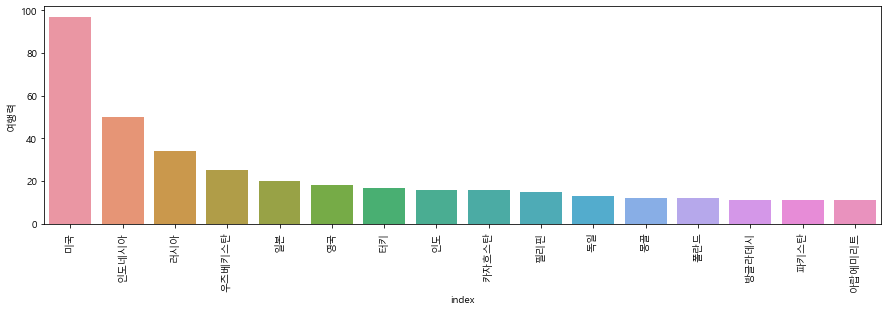

In [61]:
new_df2 = new_df['여행력'].value_counts().reset_index()
a = new_df2[new_df2['여행력'] >= 10]
plt.figure(figsize = (15,4))
plt.xticks(rotation = 90)
sns.barplot(data = a, x = 'index', y = '여행력')

## 3. 칼럼별 기술통계

In [ ]:
corona_data.describe()

### 3.1 연번

In [ ]:
corona

### 3.2 환자

### 3.3 확진일

###  3.4 거주지

### 3.5 여행력

### 3.6 접촉력

### 3.7 퇴원현황

# 서울특별시 예방접종센터 현황 데이터

## 전처리

In [ ]:
pd.read_csv('C:\study\workspace_python\pdsample\datasets\mydata\공공데이터활용지원센터_코로나19 예방접종센터 현황_20210716.csv', encoding = 'cp949')

In [ ]:
pd.read_csv('C:\study\workspace_python\pdsample\datasets\mydata\DLA_2nd_ORIGIN_DLADATA202004_20210730120000.csv', header=None)

# 코로나 19 여행사업 관련 데이터 

In [7]:
trip_df = pd.read_excel('C:\\study\\workspace_python\\pdsample\\datasets\\mydata\\코로나19 여행관련 데이터.xlsx')

In [8]:
trip_df.T

,0,1,2,3,4,5,6
항목,관광/여행,관광/여행,관광/여행,관광/여행,관광/여행,관광/여행,관광/여행
세부항목,호텔업,여관업,여행사업,항공여객운송업,철도여객운송업,휴양콘도운영업,관광/여행 지수
2021년 06월,89.7,67.7,22.5,23.9,98.8,79.3,50.5
2021년 05월,85.8,67.6,17.4,25.2,102.8,71.5,49.6
2021년 04월,77.1,64.4,17.7,21.3,91.8,60.0,44.5
...,...,...,...,...,...,...,...
2010년 05월,110.6,99.8,95.0,71.2,72.7,105.0,87.5
2010년 04월,102.3,103.1,82.6,66.3,63.9,97.7,81.3
2010년 03월,103.9,104.3,63.6,68.0,62.7,80.0,78.7
2010년 02월,94.5,98.5,67.0,61.1,68.0,109.3,76.3


In [9]:
wanted_data = trip_df.T.iloc[2:20,2]
visualization_df = wanted_data.reset_index()

In [10]:
visualization_df = visualization_df.rename(columns = {2 : 'results'})
visualization_df.head()

,index,results
0,2021년 06월,22.5
1,2021년 05월,17.4
2,2021년 04월,17.7
3,2021년 03월,16.7
4,2021년 02월,13.3


In [13]:
visualization_df['results'] = visualization_df['results'].astype(int)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

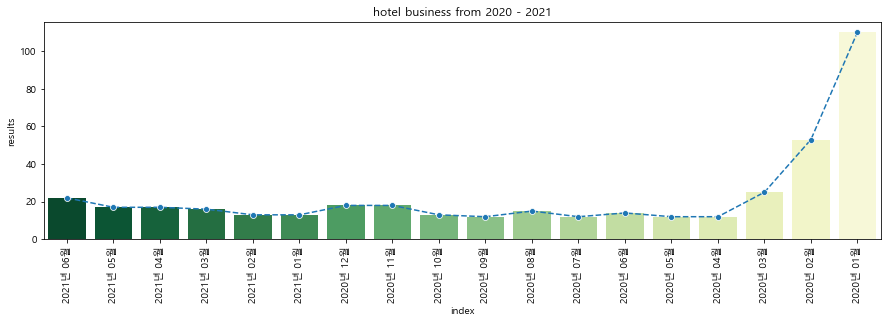

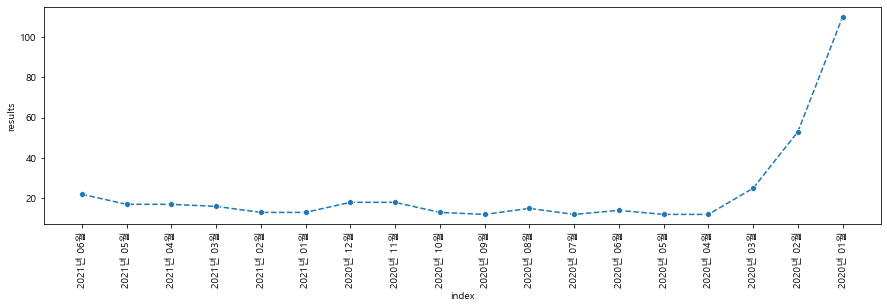

In [17]:
plt.figure(figsize = (15,4))
plt.title('hotel business from 2020 - 2021')
sns.lineplot(data = visualization_df, x = 'index', y = 'results', linestyle = '--', marker = 'o')
sns.barplot(data = visualization_df, x = 'index', y = 'results', palette='YlGn_r')
plt.xticks(rotation = 90)
plt.figure(figsize = (15,4))
sns.lineplot(data = visualization_df, x = 'index', y = 'results', linestyle = '--', marker = 'o')
plt.xticks(rotation = 90)


# plt.savefig('foryongju')

<AxesSubplot:>

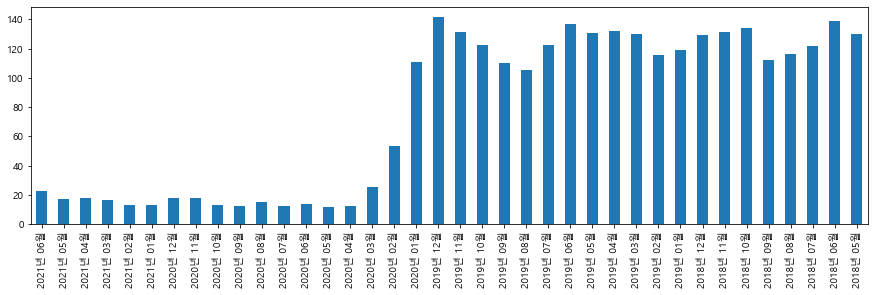

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,4))
trip_df.T.iloc[2:40,2].plot(kind = 'bar')